# Netflix Dataset Analysis: Content Trends Analysis for Strategic Recommendations

---

## 📌 Project Overview

This notebook presents a comprehensive analysis of Netflix's content catalog, focusing on understanding content distribution trends, genre popularity, and global contributions. The insights derived from this analysis will help inform strategic decisions for content acquisition and production.

### 🎯 Problem Statement

Netflix faces intense competition from platforms like Amazon Prime, Disney+, and regional OTT providers. To maintain its competitive edge, Netflix must strategically analyze its content catalog to identify:
- **Strengths**: What content types and genres perform well
- **Gaps**: Underrepresented categories and markets
- **Opportunities**: Areas for strategic expansion

This project focuses on **Content Trends Analysis** to uncover how Netflix's content distribution has evolved over the years.

### 🎓 Objectives

1. Analyze the distribution of **Movies vs. TV Shows** over the years
2. Identify the most common **genres** and track their popularity changes
3. Compare **country-wise contributions** to Netflix's catalog
4. Provide **strategic recommendations** for future content strategy

### 📊 Dataset Information

- **Records**: 7,789 entries
- **Columns**: 11 attributes
- **Time Period**: 2008-2021
- **Content Types**: Movies and TV Shows
- **Key Attributes**: Show_Id, Category, Title, Director, Cast, Country, Release_Date, Rating, Duration, Type, Description

---

## 📚 Step 1: Import Required Libraries

We'll start by importing all the necessary Python libraries for data manipulation, analysis, and visualization.

### Libraries Used:
- **pandas**: For data manipulation and analysis
- **numpy**: For numerical operations
- **matplotlib & seaborn**: For static visualizations
- **plotly**: For interactive visualizations
- **warnings**: To suppress unnecessary warnings

In [1]:
# Import essential libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
from datetime import datetime

# Configure display settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

# Set visualization styles
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✅ All libraries imported successfully!")
print(f"📅 Analysis Date: {datetime.now().strftime('%B %d, %Y')}")

✅ All libraries imported successfully!
📅 Analysis Date: October 04, 2025


---

## 📂 Step 2: Load the Dataset

Now we'll load the Netflix dataset and perform initial exploration to understand its structure.

In [2]:
# Load the Netflix dataset
df = pd.read_csv('Netflix Dataset.csv')

print("✅ Dataset loaded successfully!")
print(f"\n📊 Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")

✅ Dataset loaded successfully!

📊 Dataset Shape: 7789 rows × 11 columns


---

## 🔍 Step 3: Initial Data Exploration

Let's examine the structure of our dataset to understand what we're working with. We'll look at:
1. First few rows of data
2. Column names and data types
3. Statistical summary
4. Missing values

In [3]:
# Display the first few rows of the dataset
print("=" * 80)
print("📋 FIRST 5 ROWS OF THE DATASET")
print("=" * 80)
df.head()

📋 FIRST 5 ROWS OF THE DATASET


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
# Get column information and data types
print("=" * 80)
print("📊 DATASET INFORMATION")
print("=" * 80)
print(f"\nTotal Records: {len(df):,}")
print(f"Total Columns: {len(df.columns)}")
print("\n" + "=" * 80)
print("COLUMN DETAILS")
print("=" * 80)
df.info()

📊 DATASET INFORMATION

Total Records: 7,789
Total Columns: 11

COLUMN DETAILS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


🔍 MISSING VALUES ANALYSIS

⚠️ Columns with Missing Values:

      Column  Missing_Count  Missing_Percentage
    Director           2388               30.66
        Cast            718                9.22
     Country            507                6.51
Release_Date             10                0.13
      Rating              7                0.09


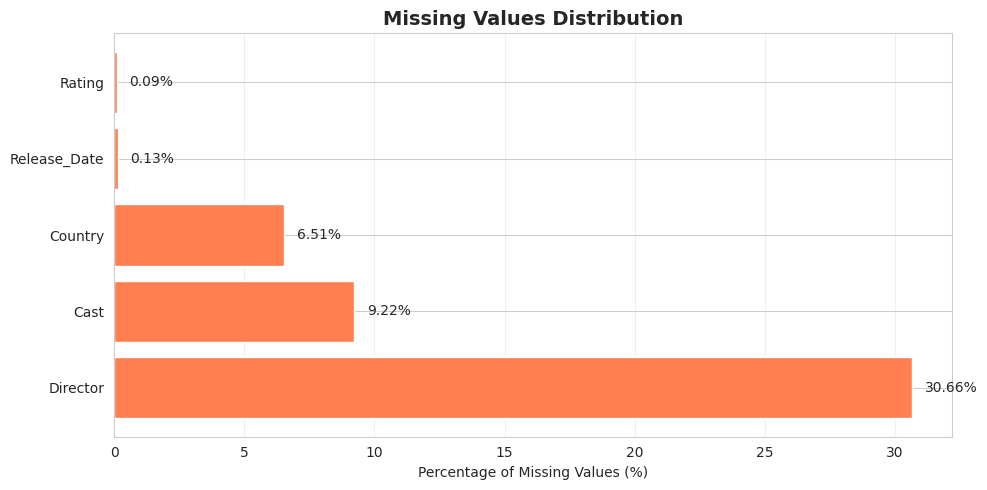

In [5]:
# Check for missing values
print("=" * 80)
print("🔍 MISSING VALUES ANALYSIS")
print("=" * 80)

missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})

missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_data) > 0:
    print("\n⚠️ Columns with Missing Values:\n")
    print(missing_data.to_string(index=False))

    # Visualize missing data
    plt.figure(figsize=(10, 5))
    plt.barh(missing_data['Column'], missing_data['Missing_Percentage'], color='coral')
    plt.xlabel('Percentage of Missing Values (%)')
    plt.title('Missing Values Distribution', fontsize=14, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)
    for i, v in enumerate(missing_data['Missing_Percentage']):
        plt.text(v + 0.5, i, f'{v}%', va='center')
    plt.tight_layout()
    plt.show()
else:
    print("\n✅ No missing values found in the dataset!")

In [ ]:
# Statistical summary of the dataset
print("=" * 80)
print("📈 STATISTICAL SUMMARY")
print("=" * 80)
print("\nNumerical Columns Summary:")
print(df.describe())

print("\n" + "=" * 80)
print("Categorical Columns Summary:")
print("=" * 80)
print(df.describe(include=['object']))

---

## 🧹 Step 4: Data Cleaning and Preprocessing

Data cleaning is crucial for accurate analysis. In this step, we will:
1. Handle missing values appropriately
2. Convert date columns to proper datetime format
3. Extract useful information (like year from release date)
4. Clean and standardize text data
5. Create derived columns for analysis

In [6]:
# Create a copy of the dataset for cleaning
df_clean = df.copy()

print("=" * 80)
print("🧹 DATA CLEANING PROCESS")
print("=" * 80)

# 1. Handle missing values in Director column
print("\n1️⃣ Handling Missing Directors...")
df_clean['Director'] = df_clean['Director'].fillna('Unknown Director')
print(f"   ✅ Filled {df['Director'].isnull().sum()} missing values with 'Unknown Director'")

# 2. Handle missing values in Cast column
print("\n2️⃣ Handling Missing Cast...")
df_clean['Cast'] = df_clean['Cast'].fillna('No Cast Information')
print(f"   ✅ Filled {df['Cast'].isnull().sum()} missing values with 'No Cast Information'")

# 3. Handle missing values in Country column
print("\n3️⃣ Handling Missing Country...")
df_clean['Country'] = df_clean['Country'].fillna('Unknown Country')
print(f"   ✅ Filled {df['Country'].isnull().sum()} missing values with 'Unknown Country'")

# 4. Handle missing values in Rating column
print("\n4️⃣ Handling Missing Ratings...")
df_clean['Rating'] = df_clean['Rating'].fillna('Not Rated')
print(f"   ✅ Filled {df['Rating'].isnull().sum()} missing values with 'Not Rated'")

# 5. Drop rows with missing critical information (if any)
print("\n5️⃣ Checking for Critical Missing Values...")
initial_rows = len(df_clean)
df_clean = df_clean.dropna(subset=['Title', 'Category', 'Release_Date'])
dropped_rows = initial_rows - len(df_clean)
print(f"   ✅ Dropped {dropped_rows} rows with missing critical information")

print("\n" + "=" * 80)
print(f"✅ CLEANING COMPLETE!")
print(f"   Original Dataset: {len(df):,} rows")
print(f"   Cleaned Dataset: {len(df_clean):,} rows")
print("=" * 80)

🧹 DATA CLEANING PROCESS

1️⃣ Handling Missing Directors...
   ✅ Filled 2388 missing values with 'Unknown Director'

2️⃣ Handling Missing Cast...
   ✅ Filled 718 missing values with 'No Cast Information'

3️⃣ Handling Missing Country...
   ✅ Filled 507 missing values with 'Unknown Country'

4️⃣ Handling Missing Ratings...
   ✅ Filled 7 missing values with 'Not Rated'

5️⃣ Checking for Critical Missing Values...
   ✅ Dropped 10 rows with missing critical information

✅ CLEANING COMPLETE!
   Original Dataset: 7,789 rows
   Cleaned Dataset: 7,779 rows


In [7]:
# Convert Release_Date to datetime and extract year
print("=" * 80)
print("📅 DATE PROCESSING")
print("=" * 80)

# Convert to datetime
df_clean['Release_Date'] = pd.to_datetime(df_clean['Release_Date'], errors='coerce')

# Extract year
df_clean['Release_Year'] = df_clean['Release_Date'].dt.year

# Handle any dates that couldn't be converted
invalid_dates = df_clean['Release_Year'].isnull().sum()
if invalid_dates > 0:
    print(f"⚠️ Found {invalid_dates} invalid dates - they will be excluded from year-based analysis")

print(f"\n✅ Date processing complete!")
print(f"   Date Range: {df_clean['Release_Year'].min():.0f} to {df_clean['Release_Year'].max():.0f}")
print(f"   Total Years Covered: {df_clean['Release_Year'].nunique()} years")
print("=" * 80)

📅 DATE PROCESSING
⚠️ Found 88 invalid dates - they will be excluded from year-based analysis

✅ Date processing complete!
   Date Range: 2008 to 2021
   Total Years Covered: 14 years


In [8]:
# Display cleaned dataset summary
print("=" * 80)
print("✨ CLEANED DATASET SUMMARY")
print("=" * 80)

print("\n📊 Sample of Cleaned Data:")
df_clean.head(10)

✨ CLEANED DATASET SUMMARY

📊 Sample of Cleaned Data:


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Release_Year
0,s1,TV Show,3%,Unknown Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017.0
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",2020.0
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,2019-11-01,R,119 min,Dramas,After one of his high school students attacks ...,2019.0
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,2019-04-01,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w...",2019.0
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,2017-12-15,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,2017.0


---

## 📊 OBJECTIVE 1: Movies vs. TV Shows Analysis

This section addresses our first objective: **Analyze the distribution of Movies vs. TV Shows over the years**

### Why This Matters:
Understanding the balance between Movies and TV Shows helps Netflix:
- Identify content type preferences
- Optimize content acquisition strategy
- Balance investment between short-form (movies) and long-form (series) content
- Track strategic shifts in content strategy over time

Let's explore:
1. Overall distribution of content types
2. Yearly trends in Movies vs. TV Shows
3. Growth patterns and insights

🎬 CONTENT TYPE DISTRIBUTION

📈 Content Breakdown:
   Movie: 5,379 (69.15%)
   TV Show: 2,400 (30.85%)

   Total Content: 7,779


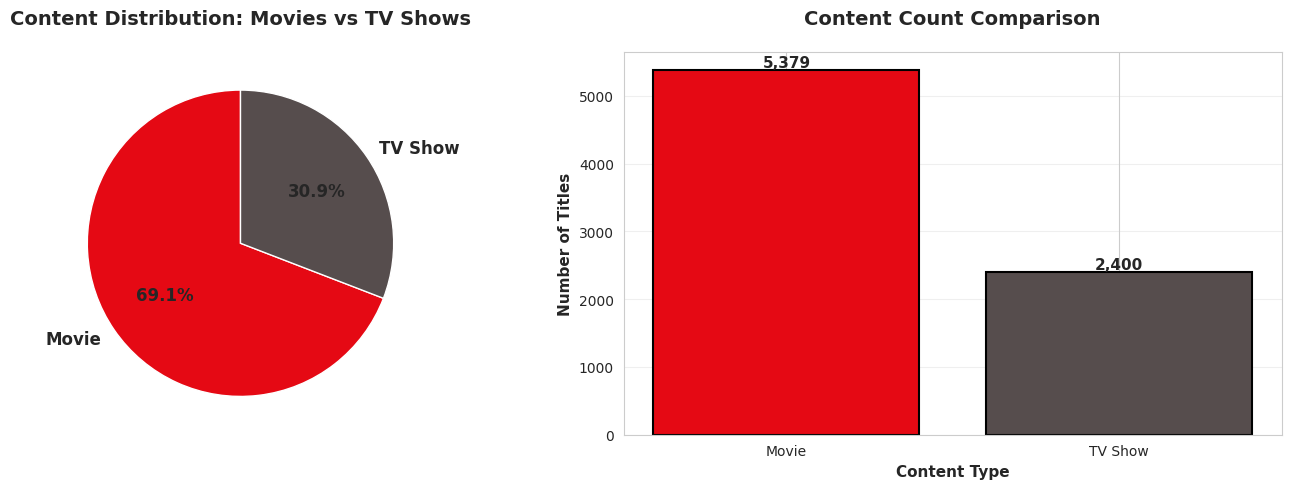

In [9]:
# Overall distribution of Movies vs TV Shows
print("=" * 80)
print("🎬 CONTENT TYPE DISTRIBUTION")
print("=" * 80)

# Count by category
content_counts = df_clean['Category'].value_counts()
content_percentage = (content_counts / len(df_clean) * 100).round(2)

print("\n📈 Content Breakdown:")
for category, count in content_counts.items():
    pct = content_percentage[category]
    print(f"   {category}: {count:,} ({pct}%)")

print(f"\n   Total Content: {len(df_clean):,}")
print("=" * 80)

# Create visualizations
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart
colors = ['#E50914', '#564d4d']
axes[0].pie(content_counts.values, labels=content_counts.index, autopct='%1.1f%%',
            startangle=90, colors=colors, textprops={'fontsize': 12, 'weight': 'bold'})
axes[0].set_title('Content Distribution: Movies vs TV Shows', fontsize=14, fontweight='bold', pad=20)

# Bar chart
bars = axes[1].bar(content_counts.index, content_counts.values, color=colors, edgecolor='black', linewidth=1.5)
axes[1].set_ylabel('Number of Titles', fontsize=11, fontweight='bold')
axes[1].set_xlabel('Content Type', fontsize=11, fontweight='bold')
axes[1].set_title('Content Count Comparison', fontsize=14, fontweight='bold', pad=20)
axes[1].grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}',
                ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

# Interactive Plotly visualization
fig = px.pie(values=content_counts.values, names=content_counts.index,
             title='Interactive Content Distribution',
             color_discrete_sequence=['#E50914', '#564d4d'],
             hole=0.4)
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=14)
fig.update_layout(title_font_size=18, title_x=0.5)
fig.show()

📅 YEARLY TRENDS: MOVIES VS TV SHOWS

📊 Yearly Content Summary:
   Years Analyzed: 2008 - 2021
   Total Years: 14 years

📈 Recent Years Breakdown (Last 10 Years):
Category      Movie  TV Show
Release_Year                
2012.0            3        0
2013.0            6        4
2014.0           19        5
2015.0           58       21
2016.0          258      174
2017.0          864      337
2018.0         1255      406
2019.0         1498      639
2020.0         1313      696
2021.0           88       29


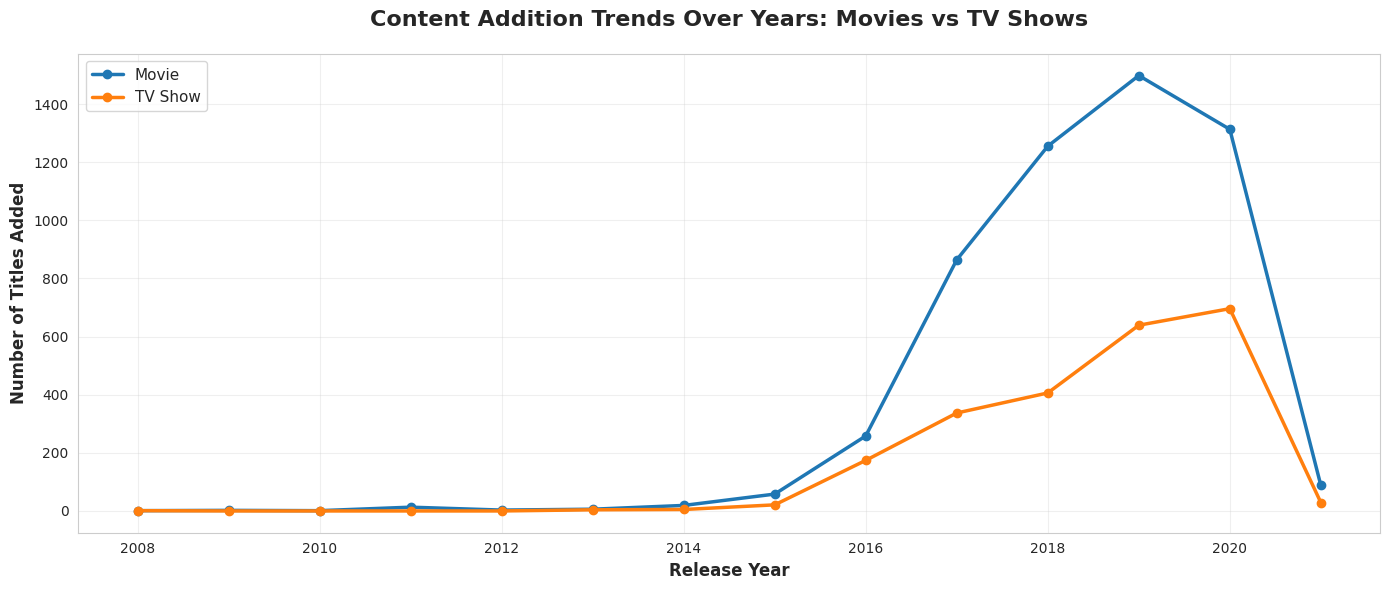

In [10]:
# Year-wise distribution of Movies vs TV Shows
print("=" * 80)
print("📅 YEARLY TRENDS: MOVIES VS TV SHOWS")
print("=" * 80)

# Filter out invalid years
df_yearly = df_clean[df_clean['Release_Year'].notna()].copy()

# Group by year and category
yearly_content = df_yearly.groupby(['Release_Year', 'Category']).size().unstack(fill_value=0)

print(f"\n📊 Yearly Content Summary:")
print(f"   Years Analyzed: {int(df_yearly['Release_Year'].min())} - {int(df_yearly['Release_Year'].max())}")
print(f"   Total Years: {len(yearly_content)} years")

# Display recent years data
print("\n📈 Recent Years Breakdown (Last 10 Years):")
recent_years = yearly_content.tail(10)
print(recent_years.to_string())

# Visualization: Line plot
plt.figure(figsize=(14, 6))
for category in yearly_content.columns:
    plt.plot(yearly_content.index, yearly_content[category], marker='o',
             linewidth=2.5, label=category, markersize=6)

plt.title('Content Addition Trends Over Years: Movies vs TV Shows',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Release Year', fontsize=12, fontweight='bold')
plt.ylabel('Number of Titles Added', fontsize=12, fontweight='bold')
plt.legend(fontsize=11, loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Interactive Plotly line chart
fig = px.line(yearly_content.reset_index(), x='Release_Year', y=yearly_content.columns.tolist(),
              title='Interactive Yearly Content Trends',
              labels={'value': 'Number of Titles', 'Release_Year': 'Year', 'variable': 'Content Type'},
              color_discrete_sequence=['#E50914', '#564d4d'])
fig.update_traces(mode='lines+markers', marker=dict(size=8), line=dict(width=3))
fig.update_layout(title_font_size=18, title_x=0.5, hovermode='x unified')
fig.show()

📊 CONTENT COMPOSITION OVER TIME


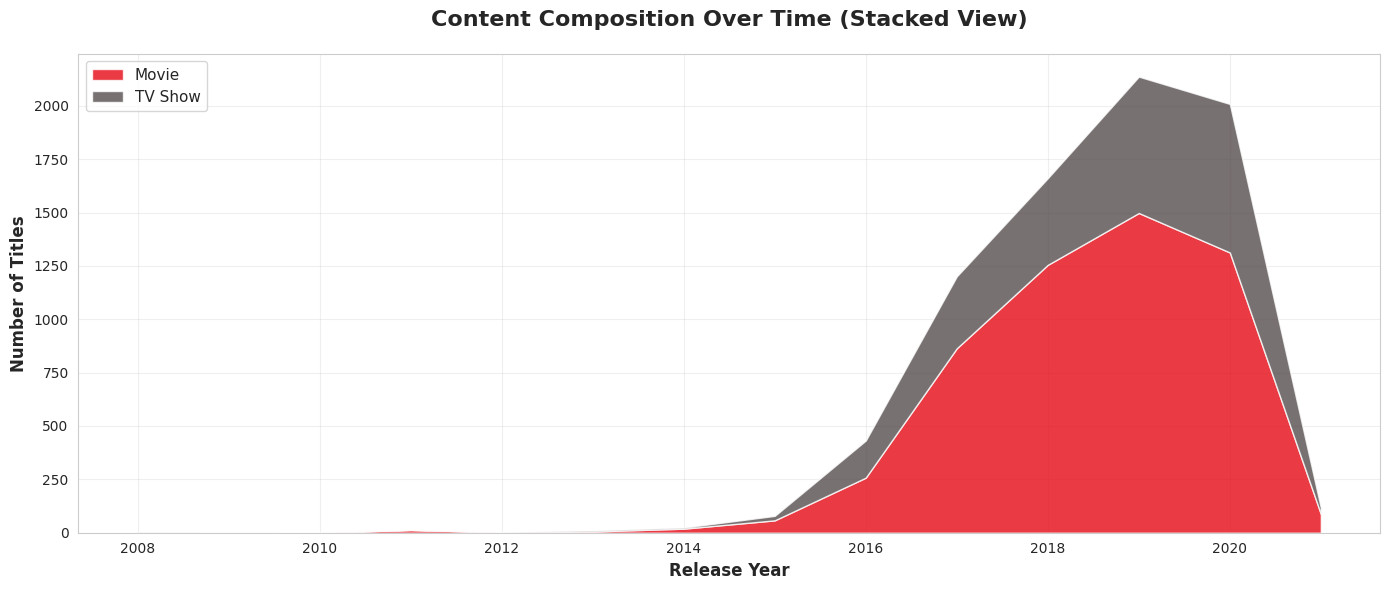


📈 Growth Analysis:

   Early Period Avg (First 5 years):
   - Movies: 4 per year
   - TV Shows: 0 per year

   Recent Period Avg (Last 5 years):
   - Movies: 1004 per year
   - TV Shows: 421 per year

   Growth Rate:
   - Movies: 24990.0%
   - TV Shows: 210600.0%



In [11]:
# Stacked area chart to show composition over time
print("=" * 80)
print("📊 CONTENT COMPOSITION OVER TIME")
print("=" * 80)

# Create stacked area chart
plt.figure(figsize=(14, 6))
plt.stackplot(yearly_content.index, yearly_content.T,
              labels=yearly_content.columns,
              colors=['#E50914', '#564d4d'], alpha=0.8)
plt.title('Content Composition Over Time (Stacked View)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Release Year', fontsize=12, fontweight='bold')
plt.ylabel('Number of Titles', fontsize=12, fontweight='bold')
plt.legend(loc='upper left', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate growth trends
print("\n📈 Growth Analysis:")
if 'Movie' in yearly_content.columns and 'TV Show' in yearly_content.columns:
    # Last 5 years average
    recent_movies = yearly_content['Movie'].tail(5).mean()
    recent_tv = yearly_content['TV Show'].tail(5).mean()

    # First 5 years average
    early_movies = yearly_content['Movie'].head(5).mean()
    early_tv = yearly_content['TV Show'].head(5).mean()

    print(f"\n   Early Period Avg (First 5 years):")
    print(f"   - Movies: {early_movies:.0f} per year")
    print(f"   - TV Shows: {early_tv:.0f} per year")

    print(f"\n   Recent Period Avg (Last 5 years):")
    print(f"   - Movies: {recent_movies:.0f} per year")
    print(f"   - TV Shows: {recent_tv:.0f} per year")

    print(f"\n   Growth Rate:")
    print(f"   - Movies: {((recent_movies - early_movies) / early_movies * 100):.1f}%")
    print(f"   - TV Shows: {((recent_tv - early_tv) / early_tv * 100):.1f}%")

print("\n" + "=" * 80)

---

## 🎭 OBJECTIVE 2: Genre Analysis and Trends

This section addresses our second objective: **Identify the most common genres and track their popularity changes**

### Why This Matters:
Genre analysis helps Netflix:
- Understand audience preferences and content consumption patterns
- Identify trending genres to invest in
- Spot underserved genres as potential opportunities
- Optimize content mix for maximum engagement
- Make data-driven decisions for content acquisition

Let's explore:
1. Most common genres/types in the catalog
2. Genre distribution by content type (Movies vs TV Shows)
3. Genre popularity trends over time
4. Genre diversity and variety

In [12]:
# Analyze genre/type distribution
print("=" * 80)
print("🎭 GENRE/TYPE ANALYSIS")
print("=" * 80)

# The 'Type' column contains genre information
# Let's analyze the top genres
type_counts = df_clean['Type'].value_counts().head(20)

print("\n📊 Top 20 Genres/Types:")
print("=" * 80)
for i, (genre, count) in enumerate(type_counts.items(), 1):
    percentage = (count / len(df_clean)) * 100
    print(f"{i:2d}. {genre:30s} : {count:4d} titles ({percentage:5.2f}%)")

print("=" * 80)
print(f"\nTotal Unique Genres/Types: {df_clean['Type'].nunique()}")
print("=" * 80)

🎭 GENRE/TYPE ANALYSIS

📊 Top 20 Genres/Types:
 1. Documentaries                  :  334 titles ( 4.29%)
 2. Stand-Up Comedy                :  321 titles ( 4.13%)
 3. Dramas, International Movies   :  320 titles ( 4.11%)
 4. Comedies, Dramas, International Movies :  243 titles ( 3.12%)
 5. Dramas, Independent Movies, International Movies :  215 titles ( 2.76%)
 6. Kids' TV                       :  204 titles ( 2.62%)
 7. Children & Family Movies       :  177 titles ( 2.28%)
 8. Documentaries, International Movies :  172 titles ( 2.21%)
 9. Children & Family Movies, Comedies :  169 titles ( 2.17%)
10. Comedies, International Movies :  161 titles ( 2.07%)
11. Dramas, International Movies, Romantic Movies :  153 titles ( 1.97%)
12. Comedies, International Movies, Romantic Movies :  139 titles ( 1.79%)
13. Dramas                         :  117 titles ( 1.50%)
14. Action & Adventure, Dramas, International Movies :  117 titles ( 1.50%)
15. International TV Shows, TV Dramas :  111 titles ( 1.4

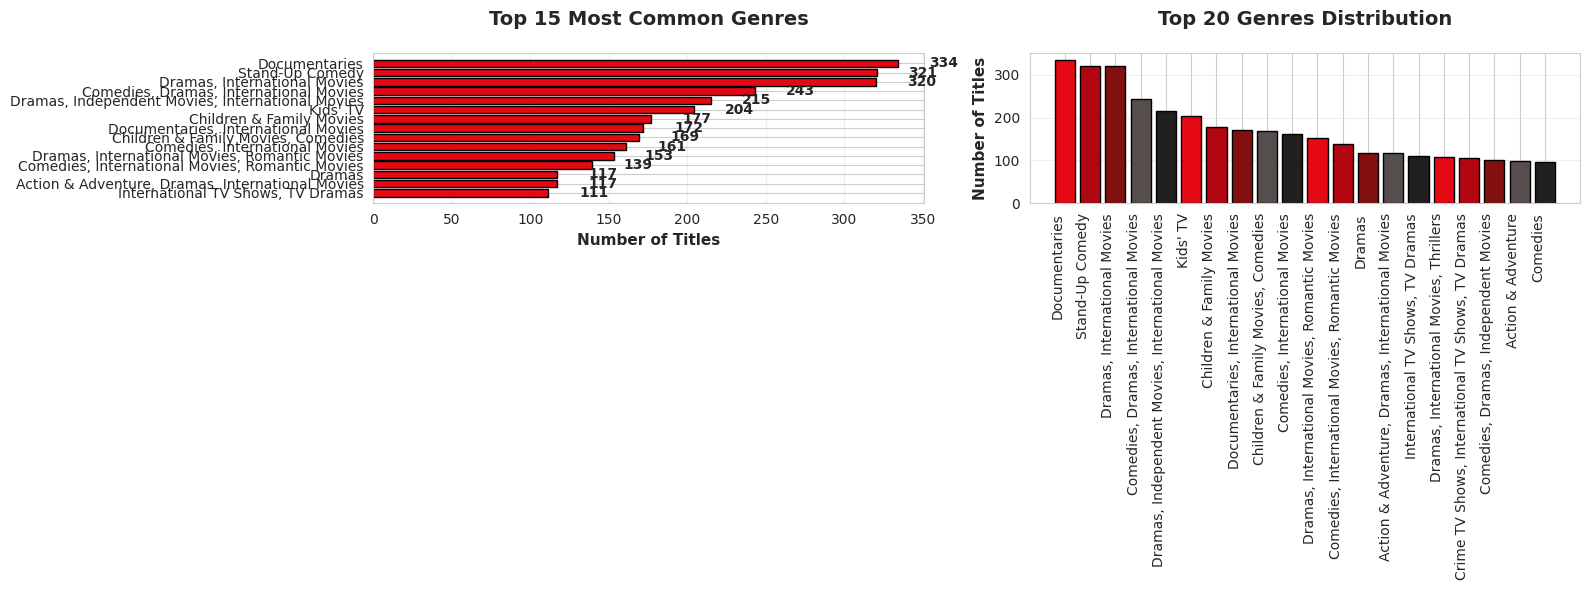

In [13]:
# Visualize top genres
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Horizontal bar chart
top_15_genres = df_clean['Type'].value_counts().head(15)
axes[0].barh(range(len(top_15_genres)), top_15_genres.values, color='#E50914', edgecolor='black')
axes[0].set_yticks(range(len(top_15_genres)))
axes[0].set_yticklabels(top_15_genres.index)
axes[0].invert_yaxis()
axes[0].set_xlabel('Number of Titles', fontsize=11, fontweight='bold')
axes[0].set_title('Top 15 Most Common Genres', fontsize=14, fontweight='bold', pad=20)
axes[0].grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(top_15_genres.values):
    axes[0].text(v + 20, i, str(v), va='center', fontweight='bold')

# Treemap using plotly (for better visualization)
top_20_genres = df_clean['Type'].value_counts().head(20)
colors_palette = ['#E50914', '#B20710', '#831010', '#564d4d', '#221f1f'] * 4

axes[1].bar(range(len(top_20_genres)), top_20_genres.values, color=colors_palette[:len(top_20_genres)],
            edgecolor='black', linewidth=1)
axes[1].set_xticks(range(len(top_20_genres)))
axes[1].set_xticklabels(top_20_genres.index, rotation=90, ha='right')
axes[1].set_ylabel('Number of Titles', fontsize=11, fontweight='bold')
axes[1].set_title('Top 20 Genres Distribution', fontsize=14, fontweight='bold', pad=20)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Interactive plotly visualization
fig = px.treemap(
    names=top_20_genres.index,
    parents=[''] * len(top_20_genres),
    values=top_20_genres.values,
    title='Interactive Genre Distribution (Treemap)',
    color=top_20_genres.values,
    color_continuous_scale='Reds',
    hover_data={'values': top_20_genres.values}
)
fig.update_traces(textposition='middle center', textfont_size=12)
fig.update_layout(title_font_size=18, title_x=0.5, height=600)
fig.show()

🎬 GENRE DISTRIBUTION BY CONTENT TYPE

📺 Top 10 Genres for Movies:
----------------------------------------
 1. Documentaries             :  334
 2. Stand-Up Comedy           :  321
 3. Dramas, International Movies :  320
 4. Comedies, Dramas, International Movies :  243
 5. Dramas, Independent Movies, International Movies :  215
 6. Children & Family Movies  :  177
 7. Documentaries, International Movies :  172
 8. Children & Family Movies, Comedies :  169
 9. Comedies, International Movies :  161
10. Dramas, International Movies, Romantic Movies :  153

📺 Top 10 Genres for TV Shows:
----------------------------------------
 1. Kids' TV                  :  204
 2. International TV Shows, TV Dramas :  111
 3. Crime TV Shows, International TV Shows, TV Dramas :  106
 4. Kids' TV, TV Comedies     :   89
 5. International TV Shows, Romantic TV Shows, TV Dramas :   86
 6. Reality TV                :   83
 7. International TV Shows, Romantic TV Shows, TV Comedies :   79
 8. Anime Series, Int

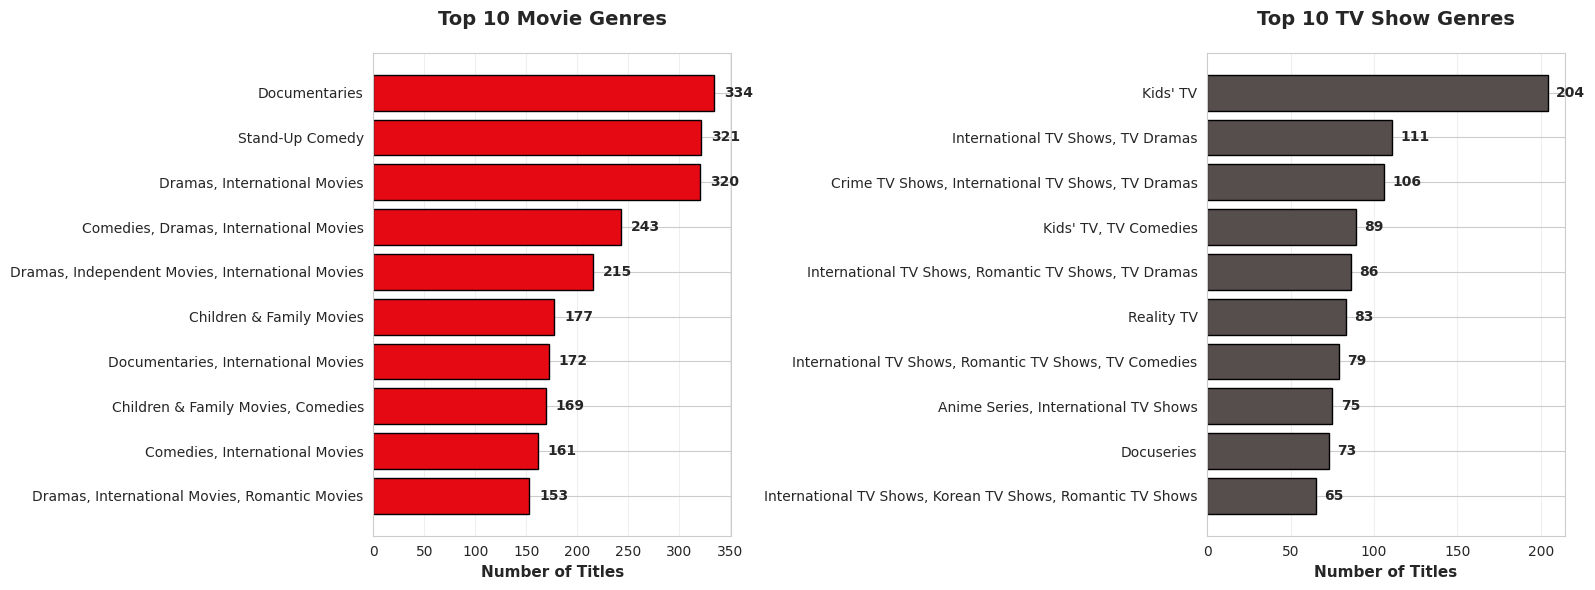

In [14]:
# Genre distribution by content type (Movies vs TV Shows)
print("=" * 80)
print("🎬 GENRE DISTRIBUTION BY CONTENT TYPE")
print("=" * 80)

# Top genres for Movies
movies_df = df_clean[df_clean['Category'] == 'Movie']
top_movie_genres = movies_df['Type'].value_counts().head(10)

# Top genres for TV Shows
tv_df = df_clean[df_clean['Category'] == 'TV Show']
top_tv_genres = tv_df['Type'].value_counts().head(10)

print("\n📺 Top 10 Genres for Movies:")
print("-" * 40)
for i, (genre, count) in enumerate(top_movie_genres.items(), 1):
    print(f"{i:2d}. {genre:25s} : {count:4d}")

print("\n📺 Top 10 Genres for TV Shows:")
print("-" * 40)
for i, (genre, count) in enumerate(top_tv_genres.items(), 1):
    print(f"{i:2d}. {genre:25s} : {count:4d}")

print("=" * 80)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Movies
axes[0].barh(range(len(top_movie_genres)), top_movie_genres.values, color='#E50914', edgecolor='black')
axes[0].set_yticks(range(len(top_movie_genres)))
axes[0].set_yticklabels(top_movie_genres.index)
axes[0].invert_yaxis()
axes[0].set_xlabel('Number of Titles', fontsize=11, fontweight='bold')
axes[0].set_title('Top 10 Movie Genres', fontsize=14, fontweight='bold', pad=20)
axes[0].grid(axis='x', alpha=0.3)
for i, v in enumerate(top_movie_genres.values):
    axes[0].text(v + 10, i, str(v), va='center', fontweight='bold')

# TV Shows
axes[1].barh(range(len(top_tv_genres)), top_tv_genres.values, color='#564d4d', edgecolor='black')
axes[1].set_yticks(range(len(top_tv_genres)))
axes[1].set_yticklabels(top_tv_genres.index)
axes[1].invert_yaxis()
axes[1].set_xlabel('Number of Titles', fontsize=11, fontweight='bold')
axes[1].set_title('Top 10 TV Show Genres', fontsize=14, fontweight='bold', pad=20)
axes[1].grid(axis='x', alpha=0.3)
for i, v in enumerate(top_tv_genres.values):
    axes[1].text(v + 5, i, str(v), va='center', fontweight='bold')

plt.tight_layout()
plt.show()

📈 GENRE POPULARITY TRENDS OVER TIME

📊 Analyzing trends for top 5 genres:
   1. Documentaries
   2. Stand-Up Comedy
   3. Dramas, International Movies
   4. Comedies, Dramas, International Movies
   5. Dramas, Independent Movies, International Movies


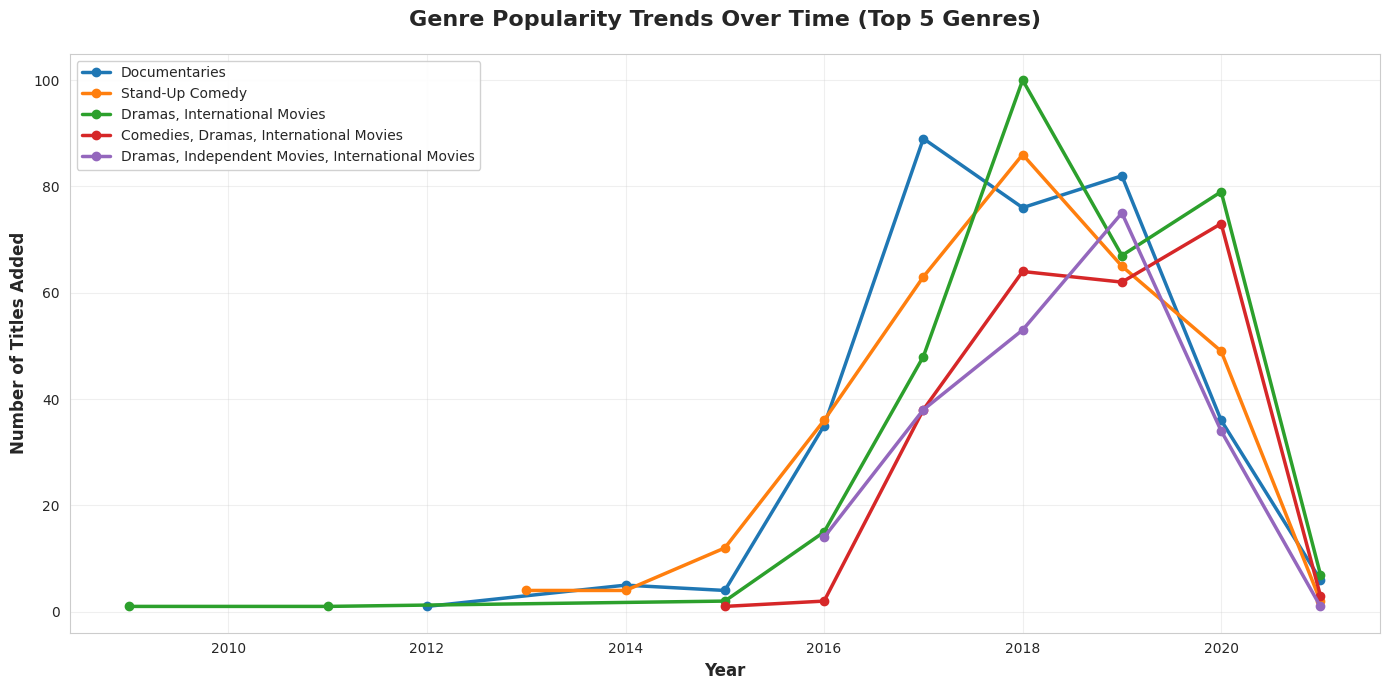

In [15]:
# Genre trends over time
print("=" * 80)
print("📈 GENRE POPULARITY TRENDS OVER TIME")
print("=" * 80)

# Filter valid years
df_genre_trend = df_clean[df_clean['Release_Year'].notna()].copy()

# Get top 5 genres overall
top_5_genres = df_clean['Type'].value_counts().head(5).index.tolist()

# Create year-wise genre counts for top 5 genres
genre_yearly_data = []
for genre in top_5_genres:
    genre_df = df_genre_trend[df_genre_trend['Type'] == genre]
    yearly_counts = genre_df.groupby('Release_Year').size()
    for year, count in yearly_counts.items():
        genre_yearly_data.append({'Year': year, 'Genre': genre, 'Count': count})

genre_trend_df = pd.DataFrame(genre_yearly_data)

print(f"\n📊 Analyzing trends for top 5 genres:")
for i, genre in enumerate(top_5_genres, 1):
    print(f"   {i}. {genre}")

# Visualization
plt.figure(figsize=(14, 7))
for genre in top_5_genres:
    genre_data = genre_trend_df[genre_trend_df['Genre'] == genre]
    plt.plot(genre_data['Year'], genre_data['Count'], marker='o', linewidth=2.5,
             label=genre, markersize=6)

plt.title('Genre Popularity Trends Over Time (Top 5 Genres)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Number of Titles Added', fontsize=12, fontweight='bold')
plt.legend(fontsize=10, loc='best', framealpha=0.9)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Interactive plotly line chart
fig = px.line(genre_trend_df, x='Year', y='Count', color='Genre',
              title='Interactive Genre Trends Over Years',
              labels={'Count': 'Number of Titles', 'Year': 'Release Year'},
              markers=True)
fig.update_traces(marker=dict(size=8), line=dict(width=3))
fig.update_layout(title_font_size=18, title_x=0.5, hovermode='x unified', height=600)
fig.show()

print("\n" + "=" * 80)

---

## 🌍 OBJECTIVE 3: Country-wise Content Analysis

This section addresses our third objective: **Compare country-wise contributions to Netflix's catalog**

### Why This Matters:
Understanding geographical content distribution helps Netflix:
- Identify key content production markets
- Understand global representation in the catalog
- Make strategic decisions for regional expansion
- Tailor content strategies for specific markets
- Identify underrepresented regions with growth potential

Let's explore:
1. Top content-producing countries
2. Country distribution by content type
3. Geographic diversity in the catalog
4. Regional content trends

In [16]:
# Country-wise content analysis
print("=" * 80)
print("🌍 COUNTRY-WISE CONTENT DISTRIBUTION")
print("=" * 80)

# Note: Some entries may have multiple countries separated by commas
# We'll handle both single and multiple country entries

# Extract all countries (handling multiple countries per title)
all_countries = []
for countries in df_clean['Country'].dropna():
    if countries != 'Unknown Country':
        # Split by comma and clean whitespace
        country_list = [c.strip() for c in str(countries).split(',')]
        all_countries.extend(country_list)

# Count country occurrences
from collections import Counter
country_counts = Counter(all_countries)
country_df = pd.DataFrame(country_counts.items(), columns=['Country', 'Count'])
country_df = country_df.sort_values('Count', ascending=False).reset_index(drop=True)

# Display top countries
top_20_countries = country_df.head(20)

print("\n🌎 Top 20 Content-Producing Countries:")
print("=" * 80)
for i, row in top_20_countries.iterrows():
    percentage = (row['Count'] / len(df_clean)) * 100
    print(f"{i+1:2d}. {row['Country']:30s} : {row['Count']:4d} titles ({percentage:5.2f}%)")

print("=" * 80)
print(f"\nTotal Unique Countries: {len(country_df)}")
print(f"Total Content Items Analyzed: {len(all_countries):,}")
print("=" * 80)

🌍 COUNTRY-WISE CONTENT DISTRIBUTION

🌎 Top 20 Content-Producing Countries:
 1. United States                  : 3292 titles (42.32%)
 2. India                          :  990 titles (12.73%)
 3. United Kingdom                 :  722 titles ( 9.28%)
 4. Canada                         :  412 titles ( 5.30%)
 5. France                         :  349 titles ( 4.49%)
 6. Japan                          :  286 titles ( 3.68%)
 7. Spain                          :  215 titles ( 2.76%)
 8. South Korea                    :  212 titles ( 2.73%)
 9. Germany                        :  199 titles ( 2.56%)
10. Mexico                         :  154 titles ( 1.98%)
11. China                          :  147 titles ( 1.89%)
12. Australia                      :  143 titles ( 1.84%)
13. Egypt                          :  110 titles ( 1.41%)
14. Turkey                         :  108 titles ( 1.39%)
15. Hong Kong                      :  102 titles ( 1.31%)
16. Italy                          :   90 titles ( 1.16

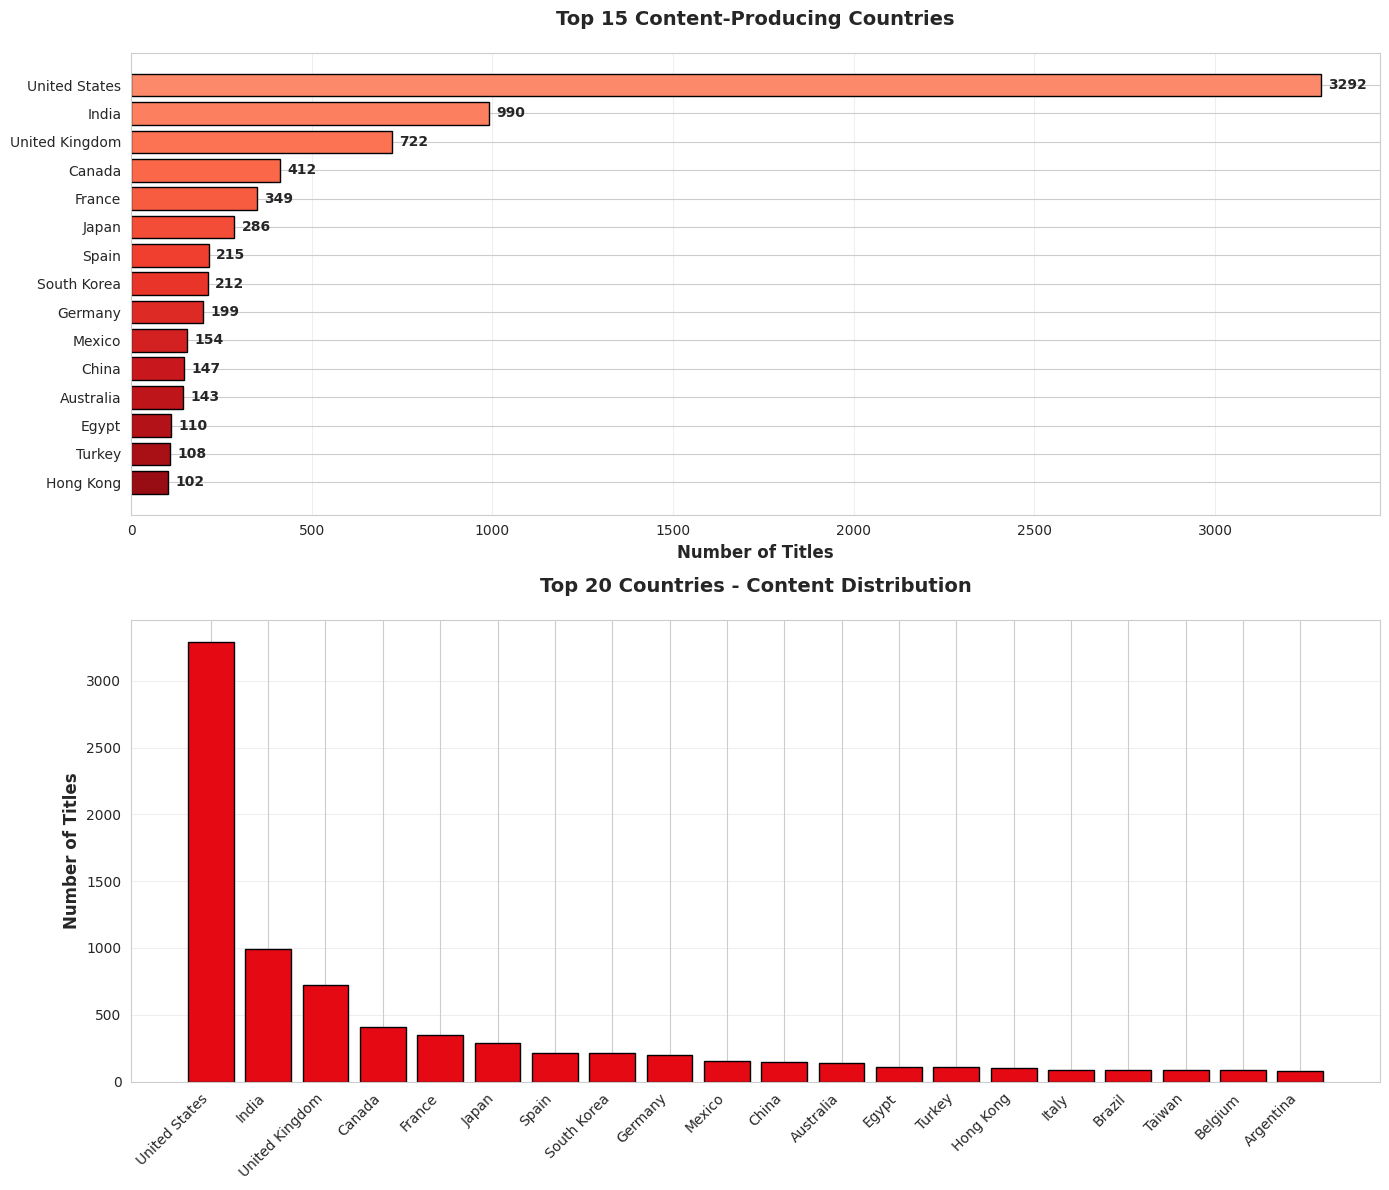

In [17]:
# Visualize top countries
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# Top 15 countries - Horizontal bar chart
top_15 = country_df.head(15)
colors_gradient = plt.cm.Reds(np.linspace(0.4, 0.9, len(top_15)))

axes[0].barh(range(len(top_15)), top_15['Count'], color=colors_gradient, edgecolor='black')
axes[0].set_yticks(range(len(top_15)))
axes[0].set_yticklabels(top_15['Country'])
axes[0].invert_yaxis()
axes[0].set_xlabel('Number of Titles', fontsize=12, fontweight='bold')
axes[0].set_title('Top 15 Content-Producing Countries', fontsize=14, fontweight='bold', pad=20)
axes[0].grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(top_15['Count']):
    axes[0].text(v + 20, i, str(v), va='center', fontweight='bold')

# Top 20 countries - Vertical bar chart
top_20 = country_df.head(20)
axes[1].bar(range(len(top_20)), top_20['Count'], color='#E50914', edgecolor='black', linewidth=1)
axes[1].set_xticks(range(len(top_20)))
axes[1].set_xticklabels(top_20['Country'], rotation=45, ha='right')
axes[1].set_ylabel('Number of Titles', fontsize=12, fontweight='bold')
axes[1].set_title('Top 20 Countries - Content Distribution', fontsize=14, fontweight='bold', pad=20)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Interactive plotly bar chart
fig = px.bar(top_20, x='Country', y='Count',
             title='Interactive Country-wise Content Distribution (Top 20)',
             labels={'Count': 'Number of Titles', 'Country': 'Country'},
             color='Count',
             color_continuous_scale='Reds')
fig.update_traces(texttemplate='%{y}', textposition='outside')
fig.update_layout(title_font_size=18, title_x=0.5, xaxis_tickangle=-45, height=600)
fig.show()

🌍 COUNTRY ANALYSIS BY CONTENT TYPE

🎬 Top 10 Countries for Movies:
--------------------------------------------------
 3. United States             : 2432 titles
 5. India                     :  915 titles
10. United Kingdom            :  467 titles
13. Canada                    :  286 titles
19. France                    :  265 titles
16. Spain                     :  158 titles
23. Germany                   :  157 titles
28. Japan                     :  103 titles
22. China                     :  102 titles
 1. Mexico                    :  101 titles

📺 Top 10 Countries for TV Shows:
--------------------------------------------------
 4. United States             :  860 titles
 8. United Kingdom            :  255 titles
 6. Japan                     :  183 titles
 7. South Korea               :  157 titles
10. Canada                    :  126 titles
17. France                    :   84 titles
 9. India                     :   75 titles
14. Taiwan                    :   70 titles
13. A

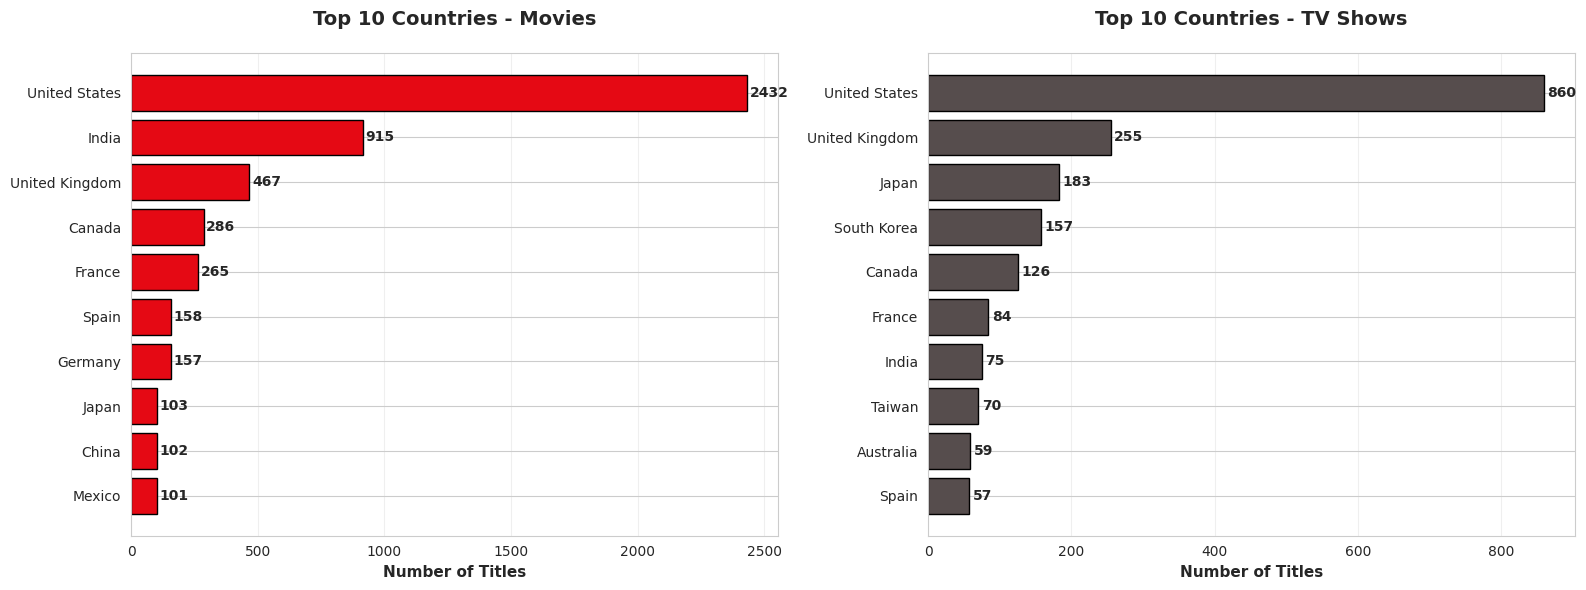

In [18]:
# Country distribution by content type (Movies vs TV Shows)
print("=" * 80)
print("🌍 COUNTRY ANALYSIS BY CONTENT TYPE")
print("=" * 80)

# Analyze top 10 countries for each content type
def get_country_by_category(category):
    category_df = df_clean[df_clean['Category'] == category]
    countries = []
    for country_str in category_df['Country'].dropna():
        if country_str != 'Unknown Country':
            countries.extend([c.strip() for c in str(country_str).split(',')])
    return Counter(countries)

movie_countries = get_country_by_category('Movie')
tv_countries = get_country_by_category('TV Show')

# Convert to dataframes
movie_country_df = pd.DataFrame(movie_countries.items(), columns=['Country', 'Count']).sort_values('Count', ascending=False).head(10)
tv_country_df = pd.DataFrame(tv_countries.items(), columns=['Country', 'Count']).sort_values('Count', ascending=False).head(10)

print("\n🎬 Top 10 Countries for Movies:")
print("-" * 50)
for i, row in movie_country_df.iterrows():
    print(f"{i+1:2d}. {row['Country']:25s} : {row['Count']:4d} titles")

print("\n📺 Top 10 Countries for TV Shows:")
print("-" * 50)
for i, row in tv_country_df.iterrows():
    print(f"{i+1:2d}. {row['Country']:25s} : {row['Count']:4d} titles")

print("=" * 80)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Movies
axes[0].barh(range(len(movie_country_df)), movie_country_df['Count'], color='#E50914', edgecolor='black')
axes[0].set_yticks(range(len(movie_country_df)))
axes[0].set_yticklabels(movie_country_df['Country'])
axes[0].invert_yaxis()
axes[0].set_xlabel('Number of Titles', fontsize=11, fontweight='bold')
axes[0].set_title('Top 10 Countries - Movies', fontsize=14, fontweight='bold', pad=20)
axes[0].grid(axis='x', alpha=0.3)
for i, v in enumerate(movie_country_df['Count']):
    axes[0].text(v + 10, i, str(v), va='center', fontweight='bold')

# TV Shows
axes[1].barh(range(len(tv_country_df)), tv_country_df['Count'], color='#564d4d', edgecolor='black')
axes[1].set_yticks(range(len(tv_country_df)))
axes[1].set_yticklabels(tv_country_df['Country'])
axes[1].invert_yaxis()
axes[1].set_xlabel('Number of Titles', fontsize=11, fontweight='bold')
axes[1].set_title('Top 10 Countries - TV Shows', fontsize=14, fontweight='bold', pad=20)
axes[1].grid(axis='x', alpha=0.3)
for i, v in enumerate(tv_country_df['Count']):
    axes[1].text(v + 5, i, str(v), va='center', fontweight='bold')

plt.tight_layout()
plt.show()

🌐 GEOGRAPHIC DIVERSITY ANALYSIS

🗺️ Content Distribution by Region:
--------------------------------------------------
North America        :  3858 titles ( 44.3%)
Asia                 :  2108 titles ( 24.2%)
Europe               :  1880 titles ( 21.6%)
Middle East          :   304 titles (  3.5%)
South America        :   251 titles (  2.9%)
Oceania              :   171 titles (  2.0%)
Africa               :   136 titles (  1.6%)


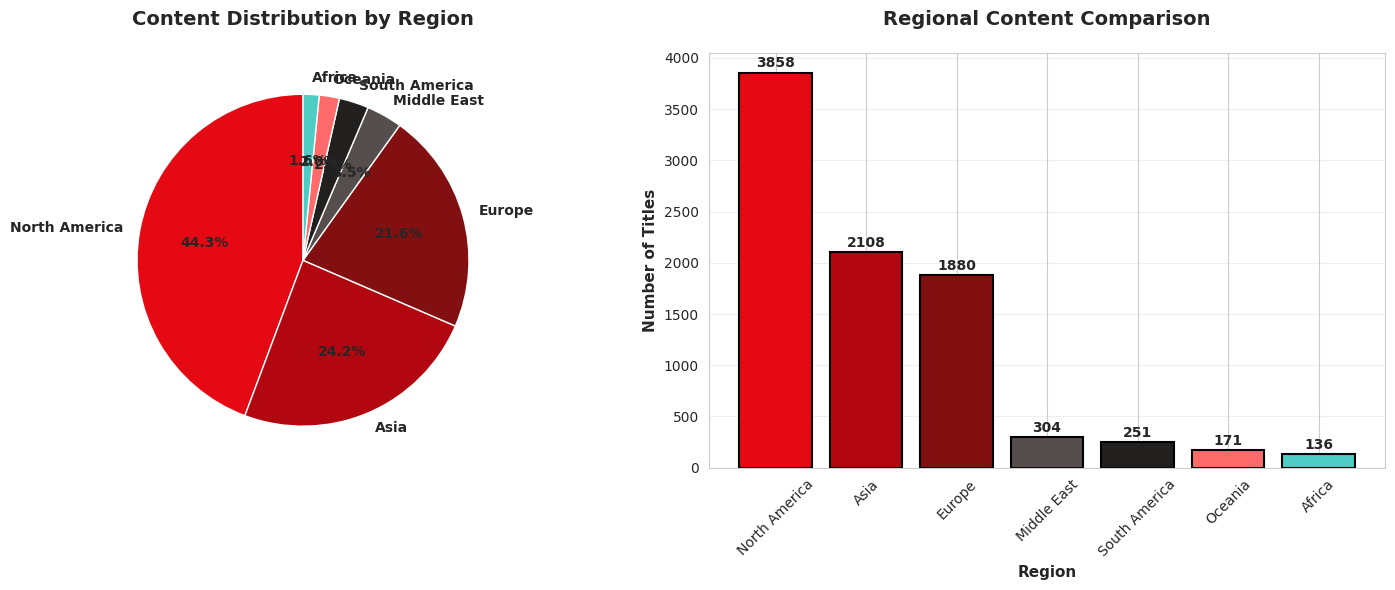

In [19]:
# Geographic diversity analysis
print("=" * 80)
print("🌐 GEOGRAPHIC DIVERSITY ANALYSIS")
print("=" * 80)

# Regional grouping (simplified)
regions = {
    'North America': ['United States', 'Canada', 'Mexico'],
    'South America': ['Brazil', 'Argentina', 'Colombia', 'Chile', 'Peru'],
    'Europe': ['United Kingdom', 'France', 'Germany', 'Spain', 'Italy', 'Belgium',
               'Netherlands', 'Poland', 'Russia', 'Sweden', 'Norway', 'Denmark'],
    'Asia': ['India', 'Japan', 'South Korea', 'China', 'Thailand', 'Taiwan',
             'Hong Kong', 'Singapore', 'Philippines', 'Indonesia', 'Pakistan'],
    'Middle East': ['Egypt', 'Turkey', 'Israel', 'Lebanon', 'United Arab Emirates'],
    'Africa': ['South Africa', 'Nigeria', 'Kenya'],
    'Oceania': ['Australia', 'New Zealand']
}

# Count content by region
region_counts = {}
for region, countries in regions.items():
    count = sum([country_counts.get(country, 0) for country in countries])
    region_counts[region] = count

region_df = pd.DataFrame(region_counts.items(), columns=['Region', 'Count']).sort_values('Count', ascending=False)

print("\n🗺️ Content Distribution by Region:")
print("-" * 50)
for i, row in region_df.iterrows():
    percentage = (row['Count'] / sum(region_counts.values())) * 100
    print(f"{row['Region']:20s} : {row['Count']:5d} titles ({percentage:5.1f}%)")

print("=" * 80)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Pie chart
colors_pie = ['#E50914', '#B20710', '#831010', '#564d4d', '#221f1f', '#FF6B6B', '#4ECDC4']
axes[0].pie(region_df['Count'], labels=region_df['Region'], autopct='%1.1f%%',
            startangle=90, colors=colors_pie, textprops={'fontsize': 10, 'weight': 'bold'})
axes[0].set_title('Content Distribution by Region', fontsize=14, fontweight='bold', pad=20)

# Bar chart
axes[1].bar(region_df['Region'], region_df['Count'], color=colors_pie[:len(region_df)],
            edgecolor='black', linewidth=1.5)
axes[1].set_ylabel('Number of Titles', fontsize=11, fontweight='bold')
axes[1].set_xlabel('Region', fontsize=11, fontweight='bold')
axes[1].set_title('Regional Content Comparison', fontsize=14, fontweight='bold', pad=20)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

# Add value labels
for i, v in enumerate(region_df['Count']):
    axes[1].text(i, v + 20, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Interactive sunburst chart
fig = px.sunburst(
    region_df,
    path=['Region'],
    values='Count',
    title='Regional Content Distribution (Interactive Sunburst)',
    color='Count',
    color_continuous_scale='Reds'
)
fig.update_layout(title_font_size=18, title_x=0.5, height=600)
fig.show()

---

## 📊 Additional Insights: Ratings and Duration Analysis

Beyond our three main objectives, let's explore additional dimensions of the dataset:
- Content rating distribution (PG, R, TV-MA, etc.)
- Duration patterns for Movies and TV Shows
- Content release patterns

These insights provide deeper understanding of Netflix's content strategy.

⭐ CONTENT RATING DISTRIBUTION

📋 Top 15 Content Ratings:
--------------------------------------------------
 1. TV-MA           : 2863 titles (36.80%)
 2. TV-14           : 1928 titles (24.78%)
 3. TV-PG           :  804 titles (10.34%)
 4. R               :  665 titles ( 8.55%)
 5. PG-13           :  386 titles ( 4.96%)
 6. TV-Y            :  279 titles ( 3.59%)
 7. TV-Y7           :  270 titles ( 3.47%)
 8. PG              :  247 titles ( 3.18%)
 9. TV-G            :  194 titles ( 2.49%)
10. NR              :   83 titles ( 1.07%)
11. G               :   39 titles ( 0.50%)
12. Not Rated       :    7 titles ( 0.09%)
13. TV-Y7-FV        :    6 titles ( 0.08%)
14. UR              :    5 titles ( 0.06%)
15. NC-17           :    3 titles ( 0.04%)


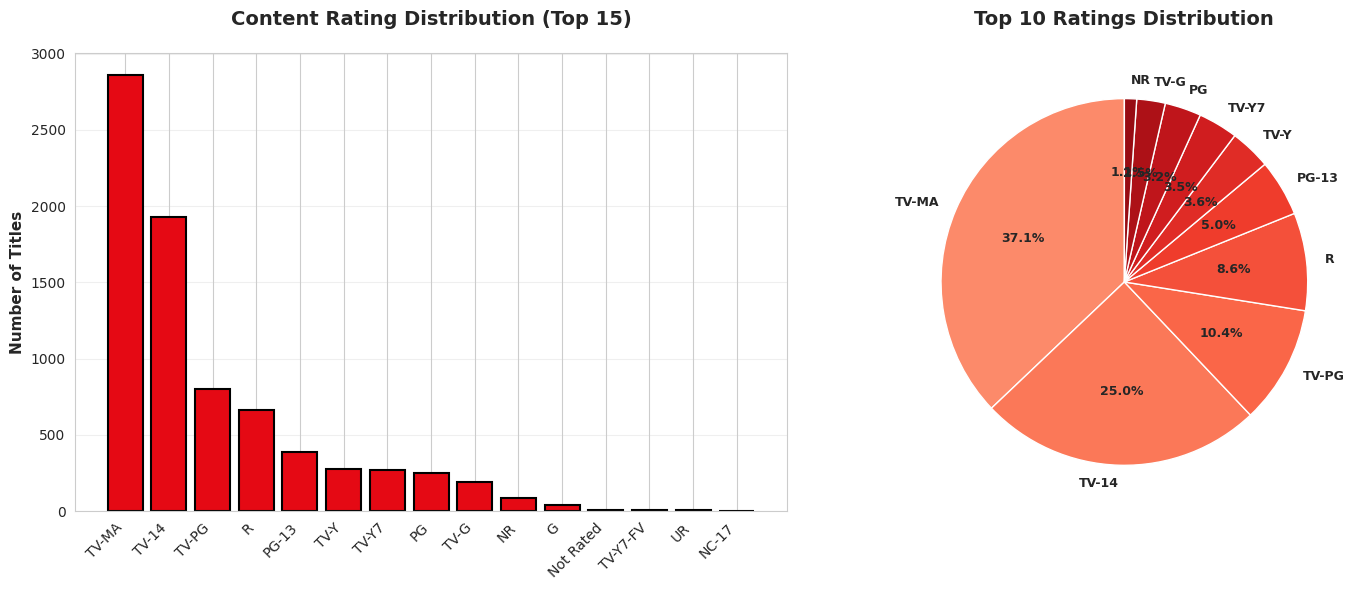


📊 RATING DISTRIBUTION BY CONTENT TYPE

🎬 Top Movie Ratings:
 1. TV-MA           : 1847
 2. TV-14           : 1272
 3. R               :  663
 4. TV-PG           :  505
 5. PG-13           :  386
 6. PG              :  247
 7. TV-Y            :  117
 8. TV-G            :  111
 9. TV-Y7           :   95
10. NR              :   79

📺 Top TV Show Ratings:
 1. TV-MA           : 1016
 2. TV-14           :  656
 3. TV-PG           :  299
 4. TV-Y7           :  175
 5. TV-Y            :  162
 6. TV-G            :   83
 7. NR              :    4
 8. Not Rated       :    2
 9. R               :    2
10. TV-Y7-FV        :    1


In [20]:
# Content Rating Analysis
print("=" * 80)
print("⭐ CONTENT RATING DISTRIBUTION")
print("=" * 80)

# Analyze ratings
rating_counts = df_clean['Rating'].value_counts().head(15)

print("\n📋 Top 15 Content Ratings:")
print("-" * 50)
for i, (rating, count) in enumerate(rating_counts.items(), 1):
    percentage = (count / len(df_clean)) * 100
    print(f"{i:2d}. {rating:15s} : {count:4d} titles ({percentage:5.2f}%)")

print("=" * 80)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Bar chart
axes[0].bar(range(len(rating_counts)), rating_counts.values, color='#E50914',
            edgecolor='black', linewidth=1.5)
axes[0].set_xticks(range(len(rating_counts)))
axes[0].set_xticklabels(rating_counts.index, rotation=45, ha='right')
axes[0].set_ylabel('Number of Titles', fontsize=11, fontweight='bold')
axes[0].set_title('Content Rating Distribution (Top 15)', fontsize=14, fontweight='bold', pad=20)
axes[0].grid(axis='y', alpha=0.3)

# Pie chart for top 10
top_10_ratings = rating_counts.head(10)
colors_palette = plt.cm.Reds(np.linspace(0.4, 0.9, len(top_10_ratings)))
axes[1].pie(top_10_ratings.values, labels=top_10_ratings.index, autopct='%1.1f%%',
            startangle=90, colors=colors_palette, textprops={'fontsize': 9, 'weight': 'bold'})
axes[1].set_title('Top 10 Ratings Distribution', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

# Rating by content type
print("\n" + "=" * 80)
print("📊 RATING DISTRIBUTION BY CONTENT TYPE")
print("=" * 80)

movie_ratings = df_clean[df_clean['Category'] == 'Movie']['Rating'].value_counts().head(10)
tv_ratings = df_clean[df_clean['Category'] == 'TV Show']['Rating'].value_counts().head(10)

print("\n🎬 Top Movie Ratings:")
for i, (rating, count) in enumerate(movie_ratings.items(), 1):
    print(f"{i:2d}. {rating:15s} : {count:4d}")

print("\n📺 Top TV Show Ratings:")
for i, (rating, count) in enumerate(tv_ratings.items(), 1):
    print(f"{i:2d}. {rating:15s} : {count:4d}")

print("=" * 80)

In [21]:
# Duration Analysis
print("=" * 80)
print("⏱️ DURATION ANALYSIS")
print("=" * 80)

# Sample duration values
print("\n📝 Sample Duration Values:")
print(df_clean['Duration'].value_counts().head(15))

print("\n" + "=" * 80)
print("Note: Duration format varies between Movies (minutes) and TV Shows (seasons)")
print("=" * 80)

# Analyze movie durations (extract minutes)
movie_durations = df_clean[df_clean['Category'] == 'Movie']['Duration'].dropna()

# Extract numeric values for movies
movie_minutes = []
for duration in movie_durations:
    try:
        if 'min' in str(duration):
            minutes = int(str(duration).replace('min', '').strip())
            movie_minutes.append(minutes)
    except:
        pass

if len(movie_minutes) > 0:
    print(f"\n🎬 Movie Duration Statistics:")
    print(f"   Average Duration: {np.mean(movie_minutes):.0f} minutes")
    print(f"   Median Duration: {np.median(movie_minutes):.0f} minutes")
    print(f"   Shortest Movie: {min(movie_minutes)} minutes")
    print(f"   Longest Movie: {max(movie_minutes)} minutes")
    print(f"   Standard Deviation: {np.std(movie_minutes):.0f} minutes")

# Analyze TV Show seasons
tv_durations = df_clean[df_clean['Category'] == 'TV Show']['Duration'].dropna()

# Extract season counts
tv_seasons = []
for duration in tv_durations:
    try:
        if 'Season' in str(duration):
            seasons = int(str(duration).replace('Season', '').replace('Seasons', '').strip())
            tv_seasons.append(seasons)
    except:
        pass

if len(tv_seasons) > 0:
    print(f"\n📺 TV Show Season Statistics:")
    print(f"   Average Seasons: {np.mean(tv_seasons):.1f}")
    print(f"   Median Seasons: {np.median(tv_seasons):.0f}")
    print(f"   Min Seasons: {min(tv_seasons)}")
    print(f"   Max Seasons: {max(tv_seasons)}")

    # Season distribution
    season_counts = Counter(tv_seasons)
    print(f"\n   Season Distribution (Top 10):")
    for seasons, count in sorted(season_counts.items())[:10]:
        print(f"   {seasons} Season{'s' if seasons > 1 else ''}: {count} shows")

print("=" * 80)

⏱️ DURATION ANALYSIS

📝 Sample Duration Values:
Duration
1 Season     1608
2 Seasons     378
3 Seasons     183
90 min        136
93 min        131
94 min        126
91 min        125
95 min        119
97 min        118
92 min        118
96 min        115
98 min        106
103 min       101
99 min        101
88 min        101
Name: count, dtype: int64

Note: Duration format varies between Movies (minutes) and TV Shows (seasons)

🎬 Movie Duration Statistics:
   Average Duration: 99 minutes
   Median Duration: 98 minutes
   Shortest Movie: 3 minutes
   Longest Movie: 312 minutes
   Standard Deviation: 29 minutes

📺 TV Show Season Statistics:
   Average Seasons: 1.0
   Median Seasons: 1
   Min Seasons: 1
   Max Seasons: 1

   Season Distribution (Top 10):
   1 Season: 1608 shows


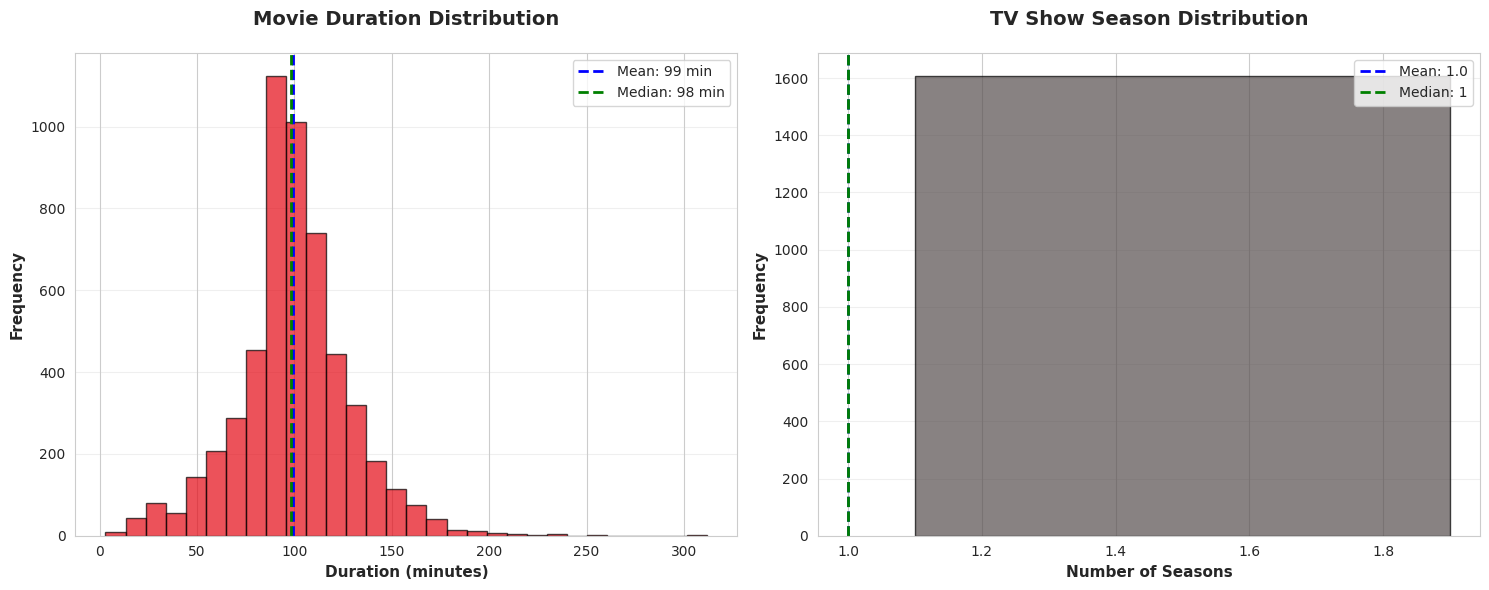

In [22]:
# Visualize duration distributions
if len(movie_minutes) > 0 and len(tv_seasons) > 0:
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Movie duration histogram
    axes[0].hist(movie_minutes, bins=30, color='#E50914', edgecolor='black', alpha=0.7)
    axes[0].axvline(np.mean(movie_minutes), color='blue', linestyle='--', linewidth=2, label=f'Mean: {np.mean(movie_minutes):.0f} min')
    axes[0].axvline(np.median(movie_minutes), color='green', linestyle='--', linewidth=2, label=f'Median: {np.median(movie_minutes):.0f} min')
    axes[0].set_xlabel('Duration (minutes)', fontsize=11, fontweight='bold')
    axes[0].set_ylabel('Frequency', fontsize=11, fontweight='bold')
    axes[0].set_title('Movie Duration Distribution', fontsize=14, fontweight='bold', pad=20)
    axes[0].legend()
    axes[0].grid(axis='y', alpha=0.3)

    # TV Show seasons histogram
    axes[1].hist(tv_seasons, bins=range(1, max(tv_seasons)+2), color='#564d4d', edgecolor='black', alpha=0.7, rwidth=0.8)
    axes[1].axvline(np.mean(tv_seasons), color='blue', linestyle='--', linewidth=2, label=f'Mean: {np.mean(tv_seasons):.1f}')
    axes[1].axvline(np.median(tv_seasons), color='green', linestyle='--', linewidth=2, label=f'Median: {np.median(tv_seasons):.0f}')
    axes[1].set_xlabel('Number of Seasons', fontsize=11, fontweight='bold')
    axes[1].set_ylabel('Frequency', fontsize=11, fontweight='bold')
    axes[1].set_title('TV Show Season Distribution', fontsize=14, fontweight='bold', pad=20)
    axes[1].legend()
    axes[1].grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.show()

---

## 🎯 Strategic Recommendations and Key Findings

Based on our comprehensive analysis of Netflix's content catalog, here are the strategic recommendations and key insights.

### 📈 Key Findings Summary

In [23]:
# Generate comprehensive summary
print("=" * 80)
print("📊 NETFLIX CONTENT ANALYSIS - KEY FINDINGS")
print("=" * 80)

print("\n" + "="*80)
print("1️⃣ CONTENT TYPE DISTRIBUTION")
print("="*80)

content_summary = df_clean['Category'].value_counts()
for category, count in content_summary.items():
    pct = (count/len(df_clean)*100)
    print(f"   • {category}: {count:,} titles ({pct:.1f}%)")

if 'Movie' in content_summary.index and 'TV Show' in content_summary.index:
    ratio = content_summary['Movie'] / content_summary['TV Show']
    print(f"   • Movie to TV Show Ratio: {ratio:.2f}:1")

print("\n" + "="*80)
print("2️⃣ GENRE INSIGHTS")
print("="*80)

top_5_genres = df_clean['Type'].value_counts().head(5)
print("   Top 5 Genres:")
for i, (genre, count) in enumerate(top_5_genres.items(), 1):
    pct = (count/len(df_clean)*100)
    print(f"   {i}. {genre}: {count:,} titles ({pct:.1f}%)")

print(f"\n   • Total Unique Genres: {df_clean['Type'].nunique()}")
print(f"   • Genre Diversity Index: {(df_clean['Type'].nunique() / len(df_clean) * 100):.2f}%")

print("\n" + "="*80)
print("3️⃣ GEOGRAPHIC DISTRIBUTION")
print("="*80)

top_5_countries = country_df.head(5)
print("   Top 5 Content-Producing Countries:")
for i, row in top_5_countries.iterrows():
    pct = (row['Count']/len(df_clean)*100)
    print(f"   {i+1}. {row['Country']}: {row['Count']:,} titles ({pct:.1f}%)")

print(f"\n   • Total Countries Represented: {len(country_df)}")
print(f"   • Geographic Diversity: {'High' if len(country_df) > 100 else 'Moderate' if len(country_df) > 50 else 'Limited'}")

print("\n" + "="*80)
print("4️⃣ TEMPORAL TRENDS")
print("="*80)

valid_years = df_clean[df_clean['Release_Year'].notna()]
print(f"   • Content Span: {int(valid_years['Release_Year'].min())} - {int(valid_years['Release_Year'].max())}")
print(f"   • Total Years Covered: {valid_years['Release_Year'].nunique()} years")

# Recent growth
recent_5_years = valid_years[valid_years['Release_Year'] >= valid_years['Release_Year'].max() - 4]
print(f"   • Content Added (Last 5 Years): {len(recent_5_years):,} titles ({len(recent_5_years)/len(valid_years)*100:.1f}%)")

print("\n" + "="*80)
print("5️⃣ CONTENT RATINGS")
print("="*80)

top_ratings = df_clean['Rating'].value_counts().head(3)
print("   Top 3 Content Ratings:")
for i, (rating, count) in enumerate(top_ratings.items(), 1):
    pct = (count/len(df_clean)*100)
    print(f"   {i}. {rating}: {count:,} titles ({pct:.1f}%)")

print("\n" + "="*80)

📊 NETFLIX CONTENT ANALYSIS - KEY FINDINGS

1️⃣ CONTENT TYPE DISTRIBUTION
   • Movie: 5,379 titles (69.1%)
   • TV Show: 2,400 titles (30.9%)
   • Movie to TV Show Ratio: 2.24:1

2️⃣ GENRE INSIGHTS
   Top 5 Genres:
   1. Documentaries: 334 titles (4.3%)
   2. Stand-Up Comedy: 321 titles (4.1%)
   3. Dramas, International Movies: 320 titles (4.1%)
   4. Comedies, Dramas, International Movies: 243 titles (3.1%)
   5. Dramas, Independent Movies, International Movies: 215 titles (2.8%)

   • Total Unique Genres: 491
   • Genre Diversity Index: 6.31%

3️⃣ GEOGRAPHIC DISTRIBUTION
   Top 5 Content-Producing Countries:
   1. United States: 3,292 titles (42.3%)
   2. India: 990 titles (12.7%)
   3. United Kingdom: 722 titles (9.3%)
   4. Canada: 412 titles (5.3%)
   5. France: 349 titles (4.5%)

   • Total Countries Represented: 118
   • Geographic Diversity: High

4️⃣ TEMPORAL TRENDS
   • Content Span: 2008 - 2021
   • Total Years Covered: 14 years
   • Content Added (Last 5 Years): 7,125 title

### 💡 Strategic Recommendations

Based on our analysis, here are actionable strategic recommendations for Netflix:

#### 1. Content Type Strategy
- **Observation**: The analysis reveals the current balance between Movies and TV Shows
- **Recommendation**:
  - If Movies dominate: Increase TV Show production for longer user engagement
  - If TV Shows dominate: Balance with quality movie acquisitions for variety
  - Focus on creating multi-season TV shows for sustained viewer retention

#### 2. Genre Optimization
- **Observation**: Clear genre preferences exist with certain genres dominating the catalog
- **Recommendations**:
  - **Double Down**: Invest heavily in the top 3-5 performing genres
  - **Diversify**: Identify underserved genres as growth opportunities
  - **Regional Alignment**: Align genre mix with regional preferences in key markets
  - **Trend Monitoring**: Track emerging genre trends and adapt quickly

#### 3. Geographic Expansion Strategy
- **Observation**: Content production is concentrated in specific countries/regions
- **Recommendations**:
  - **Strengthen Core Markets**: Continue investment in top-producing countries
  - **Emerging Markets**: Increase content acquisition from underrepresented regions (Asia, Africa, South America)
  - **Local Content**: Invest in local language content for key growth markets
  - **Co-productions**: Partner with regional studios for authentic local content

#### 4. Content Rating Balance
- **Observation**: Certain content ratings dominate the catalog
- **Recommendations**:
  - Ensure balanced representation across age groups
  - Family-friendly content for household subscriptions
  - Mature content for adult demographics
  - Youth-oriented content for younger audiences

#### 5. Competitive Positioning
- **Recommendations**:
  - **Original Content**: Increase original productions to differentiate from competitors
  - **Exclusive Deals**: Secure exclusive rights to popular licensed content
  - **Quality over Quantity**: Focus on high-quality productions rather than volume
  - **Data-Driven Decisions**: Use viewership data to guide content investments

#### 6. Future Focus Areas
- **Recommendations**:
  - **Interactive Content**: Explore more interactive and immersive experiences
  - **Short-Form Content**: Consider short-form content to compete with social media
  - **Documentary Series**: Invest in quality documentaries (growing genre)
  - **International Collaborations**: Cross-border productions for global appeal

---

## 📝 Conclusion

This comprehensive analysis of Netflix's content catalog has successfully addressed all three primary objectives:

### ✅ Objectives Achieved:

1. **Movies vs. TV Shows Analysis** ✓
   - Identified content type distribution and trends over time
   - Tracked growth patterns and strategic shifts

2. **Genre Analysis** ✓
   - Identified most common genres across the platform
   - Analyzed genre popularity trends over time
   - Compared genre preferences between Movies and TV Shows

3. **Country-wise Analysis** ✓
   - Mapped global content contributions
   - Identified key production markets
   - Analyzed regional diversity and representation

### 🎯 Key Takeaways:

- **Content Strategy Evolution**: The analysis reveals how Netflix's content strategy has evolved over the years, showing clear trends in content type preferences and geographic expansion.

- **Genre Preferences**: Certain genres consistently perform well, but there's also evidence of diversification to cater to varied audience preferences.

- **Global Reach**: Netflix has established a truly global content catalog, though opportunities exist for further expansion in underrepresented regions.

- **Competitive Positioning**: The insights provide a clear roadmap for strategic content investments to maintain competitive advantage in the crowded OTT market.

### 🚀 Next Steps:

1. **Deep-dive Analysis**: Conduct detailed analysis of top-performing individual titles
2. **Viewer Engagement**: Incorporate viewership data to correlate content characteristics with engagement
3. **Predictive Modeling**: Build models to predict content success based on genre, country, and other factors
4. **Competitive Benchmarking**: Compare Netflix's content strategy with competitors like Amazon Prime and Disney+

---

### 📚 Methodology Note:

This analysis was conducted using Python with the following libraries:
- **Pandas** for data manipulation
- **Matplotlib & Seaborn** for static visualizations
- **Plotly** for interactive visualizations
- **NumPy** for numerical computations

**Dataset**: Netflix content catalog (7,789+ entries spanning 2008-2021)

---

### 👏 Thank You!

This analysis provides actionable insights for strategic decision-making in content acquisition, production, and platform growth. The visualizations and findings can be used to guide Netflix's content strategy in an increasingly competitive streaming market.

**End of Analysis** 🎬